Dataset Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
First few rows of the dataset:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Dataset shape after dropping missing values: (1338, 7)


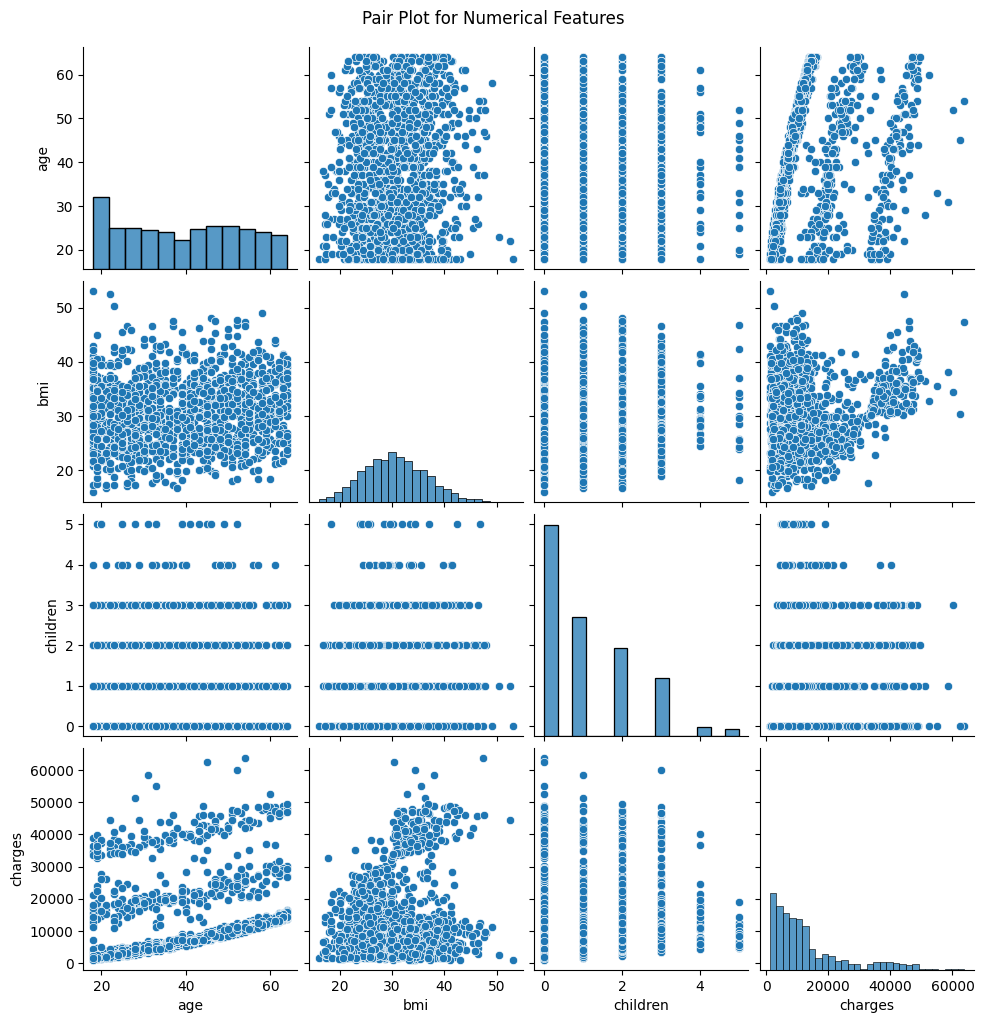

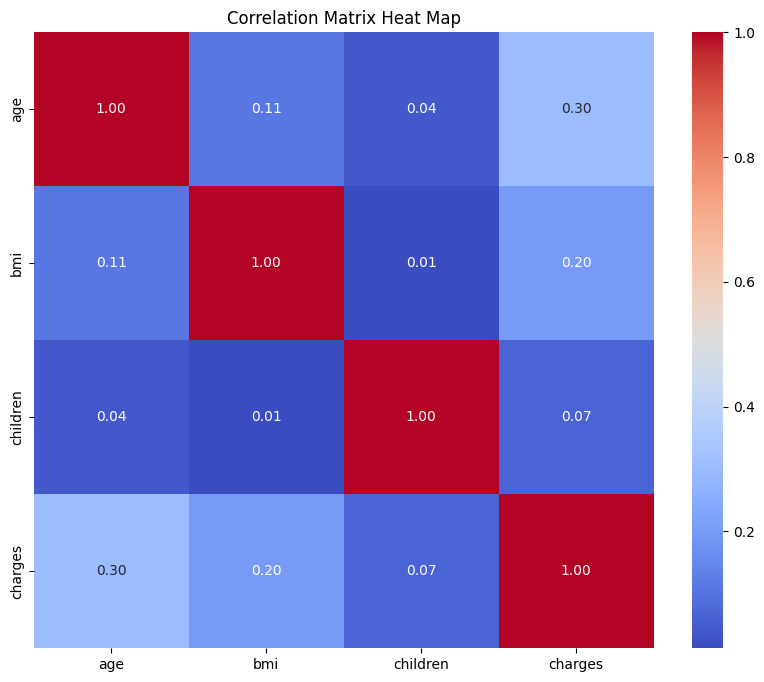

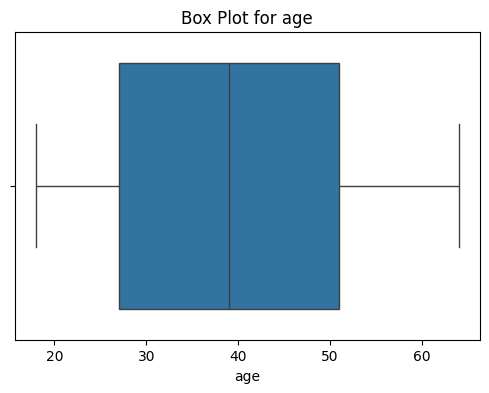

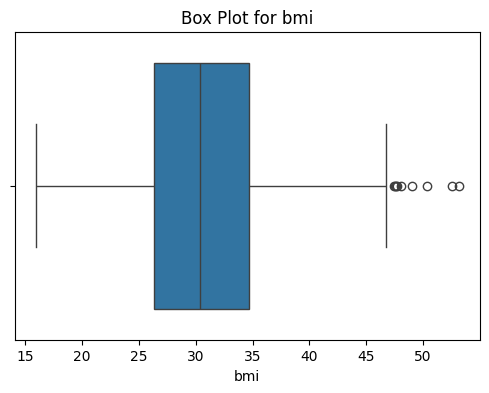

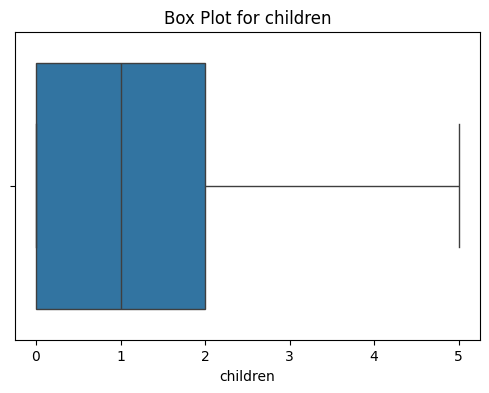

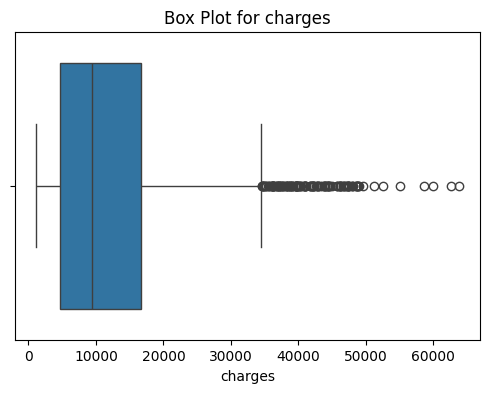


Decision Tree Regressor
Validation R^2 Score: 0.9999157123876053
Test R^2 Score: 0.9994763200246788
Test MSE: 101543.35175433522
Test MAE: 83.9727924626868
Validation R^2 Score: 0.9998462155345225
Test R^2 Score: 0.9984590116059486
Test MSE: 298802.9596711732
Test MAE: 102.8382879850748
Validation R^2 Score: 0.999615805359937
Test R^2 Score: 0.9996062209539741
Test MSE: 76355.1139406505
Test MAE: 76.23200895522405
Validation R^2 Score: 0.9997765938310459
Test R^2 Score: 0.9975701761451731
Test MSE: 471151.2183379203
Test MAE: 129.19593082089557
Best Criterion for Decision Tree: absolute_error with R^2: 0.9996062209539741

Random Forest Regressor
Validation R^2 Score: 0.9999832109094552
Test R^2 Score: 0.9997200303058867
Test MSE: 54287.08843117546
Test MAE: 60.65265766514615

Support Vector Regressor
Validation R^2 Score: -0.05148540381512401
Test R^2 Score: -0.19845542571510744
Test MSE: 232384636.78248626
Test MAE: 9889.64756641009

Model Comparison
Decision Tree Best R^2: 0.9996062

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the Dataset
file_path = r"C:\Users\justino\Desktop\insurance.csv"
data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Columns:", data.columns)
print("First few rows of the dataset:\n", data.head())

# Check and drop missing values
data.dropna(inplace=True)
print(f"Dataset shape after dropping missing values: {data.shape}")

# Step 2: Perform Preprocessing
# Identify categorical and numerical features
categorical_cols = data.select_dtypes(include=["object"]).columns
numerical_cols = data.select_dtypes(include=["number"]).columns

# Encode categorical features
if not categorical_cols.empty:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    encoded_features = ohe.fit_transform(data[categorical_cols])
    encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
else:
    encoded_features = np.empty((len(data), 0))
    encoded_feature_names = []

# Scale numerical features
if not numerical_cols.empty:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[numerical_cols])
else:
    scaled_features = np.empty((len(data), 0))

# Combine processed features into a DataFrame
processed_features = np.hstack([scaled_features, encoded_features])
feature_names = list(numerical_cols) + list(encoded_feature_names)
X = pd.DataFrame(processed_features, columns=feature_names)

# Assume the target column is `charges`
y = data["charges"]

# Step 3: Prepare Visualization
# Pair plot for numerical features
sns.pairplot(data[numerical_cols])
plt.suptitle("Pair Plot for Numerical Features", y=1.02)
plt.show()

# Correlation matrix heat map
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heat Map")
plt.show()

# Box plots for numerical features
for column in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

# Step 4: Split the Data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=0)

# Step 5: Train Regressors and Evaluate Models
# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    r2_val = r2_score(y_val, y_val_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print(f"Validation R^2 Score: {r2_val}")
    print(f"Test R^2 Score: {r2_test}")
    print(f"Test MSE: {mse_test}")
    print(f"Test MAE: {mae_test}")
    return r2_test

# Decision Tree Regressor
print("\nDecision Tree Regressor")
best_r2_dt = -np.inf
best_criterion_dt = None
criteria = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
for criterion in criteria:
    dt_model = DecisionTreeRegressor(random_state=0, criterion=criterion)
    r2 = evaluate_model(dt_model, X_train, y_train, X_val, y_val, X_test, y_test)
    if r2 > best_r2_dt:
        best_r2_dt = r2
        best_criterion_dt = criterion
print(f"Best Criterion for Decision Tree: {best_criterion_dt} with R^2: {best_r2_dt}")

# Random Forest Regressor
print("\nRandom Forest Regressor")
rf_model = RandomForestRegressor(random_state=0, n_jobs=-1)
best_r2_rf = evaluate_model(rf_model, X_train, y_train, X_val, y_val, X_test, y_test)

# SVR
print("\nSupport Vector Regressor")
svr_model = SVR(kernel="rbf", C=1.0, epsilon=0.1)
best_r2_svr = evaluate_model(svr_model, X_train, y_train, X_val, y_val, X_test, y_test)

# Step 6: Compare Models
print("\nModel Comparison")
print(f"Decision Tree Best R^2: {best_r2_dt}")
print(f"Random Forest R^2: {best_r2_rf}")
print(f"SVR R^2: {best_r2_svr}")
